In [17]:
from fitbit import Fitbit
from datetime import datetime
import json
import pandas as pd
from credentials import CLIENT_ID, CLIENT_SECRET
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [21]:
date = "2022-09-06"  # datetime.now().strftime("%Y/%m/%d")
time_interval = "14:00", "21:14"

In [27]:
try:
    with open('credentials_user.json', 'r') as f:
        user_credentials = json.load(f)
        access_token = user_credentials['access_token']
        refresh_token = user_credentials['refresh_token']

except FileNotFoundError:
    print("Your should run `obtain_token.py` first")

fb = Fitbit(access_token=access_token, refresh_token=refresh_token,
            client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

data = fb.intraday_time_series('activities/heart', 
                               base_date=date,
                               detail_level='1sec',
                               start_time=time_interval[0], 
                               end_time=time_interval[1])


In [28]:
df = pd.DataFrame(data['activities-heart-intraday']['dataset'])
df['date'] = pd.to_datetime(
    date + df.time, 
    format="%Y-%m-%d%H:%M:%S")
df

,time,value,date
0,14:43:13,92,2022-09-06 14:43:13
1,14:43:18,90,2022-09-06 14:43:18
2,14:43:28,92,2022-09-06 14:43:28
3,14:43:33,98,2022-09-06 14:43:33
4,14:43:38,99,2022-09-06 14:43:38
...,...,...,...
3543,21:06:24,66,2022-09-06 21:06:24
3544,21:06:34,67,2022-09-06 21:06:34
3545,21:06:49,67,2022-09-06 21:06:49
3546,21:06:59,64,2022-09-06 21:06:59


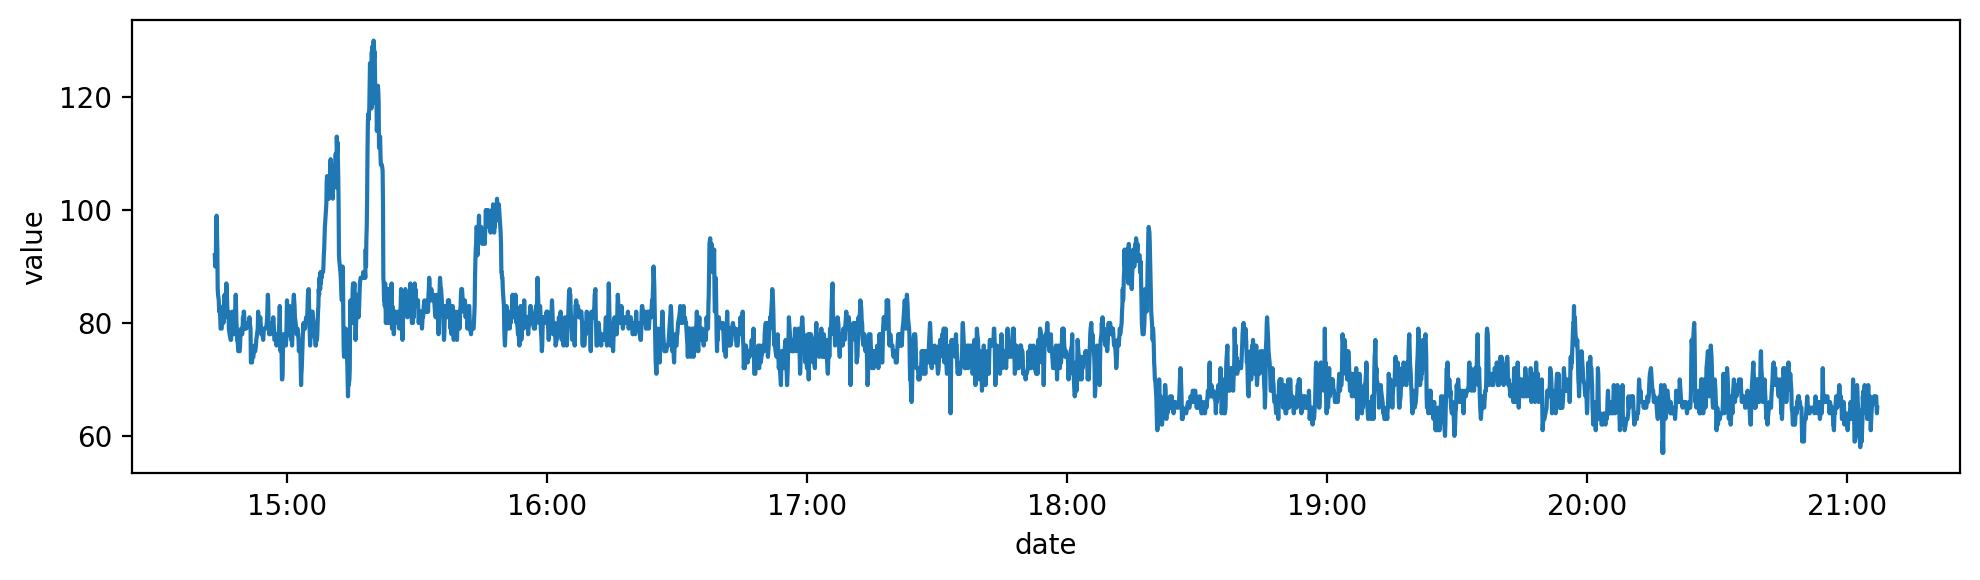

In [29]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data=df, x="date", y="value", ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.tight_layout()

In [8]:
# fb.make_request("https://api.fitbit.com/1/user/-/activities/heart/date/today/1d/1sec/time/16:30/16:32.json")